In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN

%matplotlib inline

In [ ]:
class AnomalyDetection:
  def __init__(self):
    pass 

  def svm(self,data):
    svm=OneClassSVM()
    sv=svm.fit_predict(data)
    labels=sv.labels_
    return labels

  def lof(self,data):
    lof=LocalOutlierFactor(n_neighbors=10)
    l=lof.fit_predict(data)
    labels=l.labels_
    return labels

  def dbscan(self,data):
    dbb=DBSCAN(eps=5,min_samples=5)
    dbb.fit_predict(data)
    labels=dbb.labels_
    return labels
    
  def isolotion_tree(self,data):
    iso=IsolationForest(contamination='auto',random_state=42)
    isol=iso.fit_predict(data)
    return isol
  

In [ ]:
data=pd.read_csv("swat.csv")

In [ ]:
dfc=data_without_sv[:7500]

In [ ]:
ad=AnomalyDetection()
#while (True):  # Condition: While the data consumes this loop continue to execute
  #new_data=pd.read_json("New data")
  #data.append(new_data)
labels=ad.isolotion_tree(reduceddf)
  
#Isolotion tree for clustering. 7500 row is used for clustering (training)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
reduceddf

,0,1,2,3,4,5,6,7,8,9,10,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status,Labels
0,6.771248,-1.274279,1.032603,0.712506,-0.338035,-1.259006,-0.072497,-1.066725,0.040823,-1.540635,2.239291,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1
1,6.807468,-1.279768,0.986639,0.760478,-0.301480,-1.256792,-0.119886,-1.134909,0.046477,-1.537506,2.226826,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,-1
2,5.490079,5.175324,13.538796,-5.852066,14.592118,40.774694,-4.471344,1.016314,9.196010,-3.095393,6.435070,1,1,1,1,1,1,1,0,1,2,2,2,1,1,2,-1
3,4.504652,1.878338,7.647883,-3.361913,6.825954,18.793875,-1.533520,1.002210,4.759966,-2.094323,4.098199,1,1,1,1,1,1,1,2,1,1,2,2,1,1,2,-1
4,3.343315,-0.000620,3.748501,-1.770932,2.640022,4.561563,0.002545,0.597334,1.942558,-0.388028,2.932620,1,1,1,1,1,1,1,2,1,1,2,2,2,1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,-2.701652,0.023962,-0.879721,0.378627,-2.443136,1.716467,1.181506,-1.065054,-0.737276,0.435864,0.238383,1,2,2,1,2,2,1,2,1,1,2,2,2,1,2,1
7497,-2.746989,0.012176,-0.806121,0.417667,-2.452684,1.737640,1.195618,-1.135966,-0.723292,0.446460,0.323314,1,2,2,1,2,2,1,2,1,1,2,2,2,1,2,1
7498,-2.958120,0.040190,-0.258242,1.425107,-2.753734,1.690299,-0.146301,-0.161793,-0.861934,0.559094,0.321399,2,2,2,1,2,2,1,2,1,1,2,2,2,1,2,1
7499,-2.917883,0.024948,-0.284331,1.423875,-2.751361,1.692619,-0.197683,-0.078267,-0.861632,0.535921,0.270993,2,2,2,1,2,2,1,2,1,1,2,2,2,1,2,1


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=2000)     #Prediction model
model.fit(dfc.drop(["Labels"],axis=1),dfc["Labels"])

In [ ]:
y_pred=[]   
for x in range(len(sup_data)):     #As the data streams it will predict it one by one
  y_pred.append(model.predict([sup_data.iloc[x]]))

In [ ]:
y_pred    # Anomalies

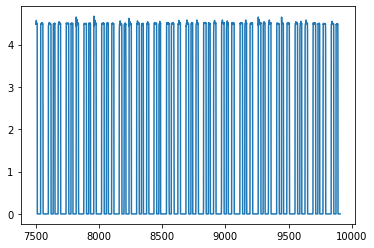

In [ ]:
outlier_pos = np.where(y_pred == -1)[0]
x = []; y = [];
for pos in outlier_pos:
    x.append(np.array(sup_data['SWAT_SUTD:RSLinx Enterprise:P1.HMI_FIT101.Pv'])[pos])
    y.append(sup_data['SWAT_SUTD:RSLinx Enterprise:P1.HMI_FIT101.Pv'].index[pos])

plt.plot(sup_data["SWAT_SUTD:RSLinx Enterprise:P1.HMI_FIT101.Pv"].loc[sup_data['SWAT_SUTD:RSLinx Enterprise:P1.HMI_FIT101.Pv'].index])
plt.plot(y,x,'r*', markersize=5)

In [ ]:
sup_data

,SWAT_SUTD:RSLinx Enterprise:P1.HMI_FIT101.Pv,SWAT_SUTD:RSLinx Enterprise:P1.HMI_LIT101.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT202.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT203.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_FIT201.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_DPIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_FIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_AIT402.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_FIT401.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT504.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT504.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P6.HMI_FIT601.Pv,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status
7501,4.49,543.71,173.26,8.71,290.67,2.38,18.11,2.05,985.00,208.61,1.65,922.57,7.09,232.68,267.94,39.37,1.66,1.36,0.61,0.31,261.72,1.17,183.48,0.00,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
7502,4.49,561.75,173.22,8.68,291.44,2.38,18.17,2.05,989.14,208.54,1.65,923.85,7.09,232.40,267.75,39.07,1.66,1.35,0.61,0.31,261.74,1.17,183.47,0.00,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
7503,4.48,572.38,173.13,8.64,293.72,2.38,18.10,2.04,992.33,208.79,1.65,926.71,7.09,232.61,267.43,39.45,1.66,1.36,0.61,0.31,261.70,1.17,183.48,0.00,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
7504,4.49,593.65,173.22,8.61,295.39,2.38,18.17,2.05,994.06,208.28,1.65,930.69,7.09,232.27,267.21,39.45,1.66,1.32,0.61,0.31,261.77,1.14,183.57,0.00,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
7505,4.57,609.29,173.13,8.55,297.86,2.38,18.13,2.04,997.50,208.74,1.65,934.13,7.09,232.66,267.27,39.61,1.66,1.34,0.61,0.32,261.63,1.19,183.41,0.00,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9903,0.00,717.07,164.32,8.86,267.93,2.39,17.73,2.04,804.92,230.38,1.65,988.94,7.38,245.12,256.15,36.76,1.66,1.37,0.60,0.31,260.96,1.12,182.20,0.00,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0
9904,0.00,698.50,164.19,8.87,267.34,2.39,0.03,0.00,817.95,230.33,1.65,984.57,7.38,245.37,255.99,37.07,1.66,1.34,0.60,0.31,260.88,1.12,182.23,1.73,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
9905,0.00,680.90,164.19,8.87,266.78,2.38,3.47,0.36,835.64,229.66,1.65,972.65,7.38,244.60,255.74,36.76,1.66,1.35,0.60,0.31,260.64,1.08,182.12,0.00,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0
9906,0.00,663.43,164.25,8.87,266.29,2.38,4.73,0.40,852.36,230.09,1.65,961.37,7.39,244.81,255.74,36.91,1.66,1.35,0.60,0.31,260.67,1.12,182.05,0.00,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0


In [ ]:
len(x)

2407

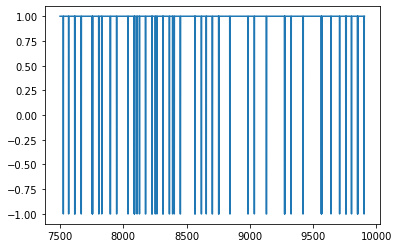

In [ ]:
plt.plot(x,y_pred)

In [ ]:
data= pd.read_csv("swat.csv")

In [ ]:
pdata=data[:7501]

In [ ]:
sv_columns=[] 
for x in pdata.columns:
  if len(pdata[x].value_counts())==1:
    sv_columns.append(x)

data_without_sv=pdata.drop(sv_columns,axis=1)
time=data_without_sv["Time"]
data_without_sv.drop(columns="Time",axis=1,inplace=True)
data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv']=data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv'].str.replace(',','')
data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv']=data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv'].str.replace(',','')
data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv']=data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv'].str.replace(',','')
data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv']=data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv'].astype(float)
data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv']=data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv'].astype(float)
data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv']=data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv'].astype(float)

        #Selecting categorical variables. After analysis it shows that categorical columns have max 3 category per column.
       #Numerical columns have more than 3 different values so we can choose columns with less than 3 values for categorical data.
cat=[]
for x in data_without_sv.columns:
  if len(data_without_sv[x].value_counts())<=3:
    cat.append(x)
dis_features=pd.DataFrame(data=data_without_sv[cat])
con_features = pd.DataFrame(data_without_sv.drop(columns=cat,axis=1))

In [ ]:
scaler= StandardScaler()
con_feature_standart=scaler.fit_transform(con_features)
con_feature_standart=pd.DataFrame(data=con_feature_standart,columns=con_features.columns)
dreductor=PCA(n_components=0.96)
reduced= dreductor.fit(con_feature_standart)
reducedd=dreductor.transform(con_feature_standart)
reduceddf=pd.DataFrame(data=reducedd)
encoded = pd.get_dummies(dis_features,columns=dis_features.columns)

In [ ]:
reduceddf=reduceddf.join(dis_features)

In [ ]:
pdata=data[7505:7506]

In [ ]:
new_data_without_sv=pdata.drop(sv_columns,axis=1)
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv'].str.replace(',','')
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv'].str.replace(',','')
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv'].str.replace(',','')
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv'].astype(float)
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv'].astype(float)
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv'].astype(float)


In [ ]:
dis_features=pd.DataFrame(data=new_data_without_sv[cat])
con_features = pd.DataFrame(new_data_without_sv.drop(columns=cat,axis=1))

In [ ]:
reduceddf

,0,1,2,3,4,5,6,7,8,9,10
0,6.771248,-1.274279,1.032603,0.712506,-0.338035,-1.259006,-0.072497,-1.066725,0.040823,-1.540635,2.239291
1,6.807468,-1.279768,0.986639,0.760478,-0.301480,-1.256792,-0.119886,-1.134909,0.046477,-1.537506,2.226826
2,5.490079,5.175324,13.538796,-5.852066,14.592118,40.774694,-4.471344,1.016314,9.196010,-3.095393,6.435070
3,4.504652,1.878338,7.647883,-3.361913,6.825954,18.793875,-1.533520,1.002210,4.759966,-2.094323,4.098199
4,3.343315,-0.000620,3.748501,-1.770932,2.640022,4.561563,0.002545,0.597334,1.942558,-0.388028,2.932620
...,...,...,...,...,...,...,...,...,...,...,...
7496,-2.701652,0.023962,-0.879721,0.378627,-2.443136,1.716467,1.181506,-1.065054,-0.737276,0.435864,0.238383
7497,-2.746989,0.012176,-0.806121,0.417667,-2.452684,1.737640,1.195618,-1.135966,-0.723292,0.446460,0.323314
7498,-2.958120,0.040190,-0.258242,1.425107,-2.753734,1.690299,-0.146301,-0.161793,-0.861934,0.559094,0.321399
7499,-2.917883,0.024948,-0.284331,1.423875,-2.751361,1.692619,-0.197683,-0.078267,-0.861632,0.535921,0.270993


In [ ]:
con_features.drop("Time",axis=1,inplace=True)


KeyError: ignored

In [ ]:
con_feature_standart=scaler.transform(con_features)


In [ ]:
con_feature_standart=pd.DataFrame(data=con_feature_standart,columns=con_features.columns)
con_feature_standart

,SWAT_SUTD:RSLinx Enterprise:P1.HMI_FIT101.Pv,SWAT_SUTD:RSLinx Enterprise:P1.HMI_LIT101.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT202.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT203.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_FIT201.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_DPIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_FIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_AIT402.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_FIT401.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT504.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT504.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P6.HMI_FIT601.Pv
0,1.455221,-1.181936,-0.449799,1.444762,-1.373569,0.816703,0.707992,0.646184,0.85416,2.128433,0.438356,0.668412,-0.199734,1.892839,0.962054,0.146827,0.438278,0.448431,0.440049,0.383502,0.462484,-0.248676,0.431809,-0.104161


In [ ]:
reducedd=dreductor.transform(con_feature_standart)
reduceddf=pd.DataFrame(data=reducedd)

In [ ]:
reduceddf

,0,1,2,3,4,5,6,7,8,9,10
0,-2.866596,0.084164,-0.473078,1.304173,-2.660319,1.630358,-0.279742,0.135914,-0.887552,0.527082,0.058362


In [ ]:
reduceddf

,0,1,2,3,4,5,6,7,8,9,10
0,-2.844845,0.152514,-0.500672,1.269894,-2.602423,1.654382,-0.307753,0.171701,-0.851413,0.503703,0.02728


In [ ]:
#Steps

In [ ]:
new_data_without_sv=pdata.drop(sv_columns,axis=1)
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv'].str.replace(',','')
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv'].str.replace(',','')
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv'].str.replace(',','')
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv'].astype(float)
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv'].astype(float)
new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv'].astype(float)
dis_features=pd.DataFrame(data=new_data_without_sv[cat])
con_features = pd.DataFrame(new_data_without_sv.drop(columns=cat,axis=1))
con_features.drop("Time",axis=1,inplace=True)
con_feature_standart=scaler.transform(con_features)
con_feature_standart=pd.DataFrame(data=con_feature_standart,columns=con_features.columns)
reducedd=dreductor.transform(con_feature_standart)
reduceddf=pd.DataFrame(data=reducedd)

dis_features.reset_index(inplace=True)
dis_features.drop(['index'],axis=1,inplace=True)
reduceddf=reduceddf.join(dis_features)

In [ ]:
reduceddf 

,0,1,2,3,4,5,6,7,8,9,10,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status
0,-2.809298,0.278573,-0.595206,1.176288,-2.475658,1.609756,-0.398985,0.335725,-0.857016,0.464104,-0.11096,2,2,2,1,2,2,1,2,1,1,2,2,2,1,2


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(reduceddf.drop("Labels",axis=1),reduceddf["Labels"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(max_iter=1000)

In [ ]:
new_data=data[7501:]

In [ ]:
y_pred=[]
for x in range(len(new_data)):
  pdata=new_data.iloc[x]
  pdatadf=pd.DataFrame(data=pdata)
  pdatadf=pdatadf.T
  new_data_without_sv=pdatadf.drop(sv_columns, axis=1)
  new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv'].str.replace(',','')
  new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv'].str.replace(',','')
  new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv'].str.replace(',','')
  new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv'].astype(float)
  new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv'].astype(float)
  new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv']=new_data_without_sv['SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv'].astype(float)
  dis_features=pd.DataFrame(data=new_data_without_sv[cat])
  ncon_features = pd.DataFrame(new_data_without_sv.drop(columns=cat,axis=1))
  ncon_features.drop("Time",axis=1,inplace=True)
  ncon_feature_standart=scaler.transform(ncon_features)
  ncon_feature_standart=pd.DataFrame(data=ncon_feature_standart,columns=ncon_features.columns)
  nreducedd=dreductor.transform(ncon_feature_standart)
  nreduceddf=pd.DataFrame(data=nreducedd)
  dis_features.reset_index(inplace=True)
  dis_features.drop(['index'],axis=1,inplace=True)
  nreduceddf=nreduceddf.join(dis_features)
  l=model.predict(nreduceddf)
  nreduceddf["Label"]=l
  print(nreduceddf)
  y_pred.append(l)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


         0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.89721  0.061024  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.866596  0.084164  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.844845  0.152514  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.785328  0.180723  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.809298  0.278573  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.728918  0.340518  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


         0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.55525  0.449493  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.332302  0.433373  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.283476  0.431267  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


          0        1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.215108  0.43986  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.156344  0.461809  ...                                                2      1

[1 rows x 27 columns]
          0        1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.053696  0.50609  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.804713  0.483426  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.835793  0.504436  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.812232  0.521658  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


         0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.78242  0.501628  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.760808  0.512381  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.712078  0.521786  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.704439  0.518677  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.692452  0.535816  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.739865  2.458957  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


         0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.96397  1.136992  ...                                                2      1

[1 rows x 27 columns]
         0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.10125  0.275536  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.134385  0.372401  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.130099  0.499931  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.141923  0.624201  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.229033  0.818628  ...                                                2     -1

[1 rows x 27 columns]
          0        1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.381557  0.89227  ...                                                2     -1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


          0        1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.361159  1.05435  ...                                                2     -1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -1.917026  1.216896  ...                                                2      1

[1 rows x 27 columns]
         0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.13045  1.357436  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.179158  1.476868  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.207768  1.577524  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.441702  1.710045  ...                                                2      1

[1 rows x 27 columns]
         0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.48213  1.770257  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.427379  1.849859  ...                                                2      1

[1 rows x 27 columns]
          0        1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.396498  1.86783  ...                                                2      1

[1 rows x 27 columns]
         0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.41399  1.943334  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.376495  1.994054  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.572366  2.036662  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.539207  2.096408  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.504179  2.120799  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.500245  2.182173  ...                                                2      1

[1 rows x 27 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.456948  2.219001  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.410224  2.250225  ...                                                2      1

[1 rows x 27 columns]
          0         1  ...  SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status  Label
0 -2.376086  2.296658  ...                                                2      1

[1 rows x 27 columns]


KeyboardInterrupt: ignored

In [ ]:
y_pred

[array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([-1]),
 array([-1]),
 array([-1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([-1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([